Feature selection is a method that helps in the inclusion of the significant variables that
help form a model with good predictive power.
Features or variables that are redundant or irrelevant can negatively impact the
performance of the model, thus it becomes necessary to remove them

Benefits of Feature Selection
It reduces overfitting as the unwanted variables are removed, and the focus is on the significant variables.
It removes irrelevant information, which helps to improve the accuracy of the model’s predictions.
It reduces the computation time involved to get the model's predictions.

Dimensionality Reduction
Dimensionality reduction is the method of transforming a collection of data having large dimensions into data of smaller dimensions while
ensuring that identical information is conveyed concisely.
Dimensionality Reduction Techniques
Some of the techniques used for dimensionality reduction are:
1. Imputing missing values
2. Dropping low-variance variables
3. Decision trees (DT)
4. Random forest (RF)
5. Reducing highly correlated variables
6. Backward feature elimination
7. Factor analysis

Pros of Dimensionality Reduction
It helps to compress data, reducing the storage space needed.
It cuts down on computing time.
It also aids in the removal of redundant features.
Cons of Dimensionality Reduction
Some data may will be lost as a result.
We use certain thumb rules when we do not know how many principal components to keep in practice.

Eigenvalues:
It represents the explained variance of each factor from the total variance and is also known as the characteristic roots.
Ways to Choose Factors:
The eigenvalues are a good measure for identifying the significant factors. An eigenvalue greater than 1 is considered for the selection
criteria of the feature.
Apart from observing values, the graphical approach is used that visually represents the factors' eigenvalues. This visualization is
known as the scree plot. A Scree plot helps in determining the number of factors where the curve makes an elbow.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline



In [2]:
df = pd.read_csv('/Users/michaeldionne/Library/CloudStorage/Dropbox/AI_ML Bootcamp/Caltech-AI-Machine-Learning-Bootcamp/Course4_Applied Data Science with Python/Datasets_4754/LVC Datasets/Lesson_8/breast-cancer-data.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


pd.read_csv function is used to read the "breast-cancer-data.csv" file and df.head() will show the top 5 rows of the dataset.
dataframe or df is a variable that will store the data read by the csv file.
head will show the rows and () default take the 5 top rows as output.
one more example - df.head(3) will show the top 3 rows.

In [3]:
df.shape


(569, 32)

In [4]:
df.info


<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [5]:
feature_names = np.array(['mean radius' 'mean texture' 'mean perimeter' 'mean area'
'mean smoothness' 'mean compactness' 'mean concavity'
'mean concave points' 'mean symmetry' 'mean fractal dimension'
'radius error' 'texture error' 'perimeter error' 'area error'
'smoothness error' 'compactness error' 'concavity error'
'concave points error' 'symmetry error' 'fractal dimension error'
'worst radius' 'worst texture' 'worst perimeter' 'worst area'
'worst smoothness' 'worst compactness' 'worst concavity'
'worst concave points' 'worst symmetry' 'worst fractal dimension'])


In [6]:
#### Convert diagnosis column to 1/0 and store in new column target
from sklearn.preprocessing import LabelEncoder


The sklearn.preprocessing package contains a number of useful utility methods and transformer classes for converting raw feature
vectors into a format that is suitable for downstream estimators.
LabelEncoder encodes labels with a value between 0 and n_classes-1 where n is the number of distinct labels.
These libraries are written with an import keyword.

In [7]:
# # Encode label diagnosis
#M -> 1
#B -> 0
#Converting diagnosis to numerical variable in df
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)


Adequacy Test
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Can we find the factors in the dataset? Checking
factorability or sampling adequacy can be done in two ways:
1- The Bartlett's Test
2- Test of Kaiser-Meyer-Olkin

Factor analysis is an exploratory data analysis method used to search for influential underlying factors or latent variables from a set of
observed variables.
Now, you are trying to perform factor analysis by using the factor analyzer module. Use the below code for calculating_bartlett_sphericity.

In [8]:
!pip install factor_analyzer


  Using cached factor_analyzer-0.4.1.tar.gz (41 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pre_commit-3.0.4-py2.py3-none-any.whl (202 kB)
  Using cached cfgv-3.3.1-py2.py3-none-any.whl (7.3 kB)
  Using cached nodeenv-1.7.0-py2.py3-none-any.whl (21 kB)
  Using cached identify-2.5.18-py2.py3-none-any.whl (98 kB)
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42014 sha256=409d8c1a600dcc33db12702e61e8820df53f98b1f6988707776e4657f7bb5289
  Stored in directory: /Users/michaeldionne/Library/Caches/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


Bartlett's Test
Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against
the identity matrix. If the test is found to be statistically insignificant, you should not employ a factor analysis.
Note: This test checks for the intercorrelation of observed variables by comparing the observed correlation matrix against the identity
matrix.

In [9]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(40196.16116300995, 0.0)

In this Bartlett’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an
identity matrix.

Kaiser-Meyer-Olkin Test
The Kaiser-Meyer-Olkin (KMO) test determines if data is suitable for factor analysis.
It assesses the suitability of each observed variable as well as the entire model.


In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)


/Users/michaeldionne/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [12]:
kmo_model


0.26062906217560244

In the above code, we are calculating the KMO. KMO estimates the proportion of variance among all the observed variables.
The overall KMO for the data is 0.25, which is excellent. This value indicates that you can proceed with your planned factor analysis.

In [13]:
df.head(2)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


The KMO value is less than 0.5, and this indicates that we need to delete the insignificant variables.



In [14]:
#Finding Significant Variables
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [15]:
#creating a dataset of significant variables
df_corr = df[['radius_mean','perimeter_mean', 'area_mean','radius_worst','perimeter_worst',
'area_worst','concavity_mean','concave points_mean', 'concavity_worst',
'concave points_worst','diagnosis']]



In [16]:
#Run KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_corr)
kmo_model


0.8260787423549146

The value of the KMO model is greater than 0.5. Therefore, the dataset is good enough for factor analysis.

In [17]:
#factor analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation='varimax')
fa.fit(df_corr,11)


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [18]:
ev, v = fa.get_eigenvalues()
ev


array([9.09178108e+00, 1.15744917e+00, 3.30050451e-01, 1.75328755e-01,
       1.20114615e-01, 8.46813558e-02, 2.04348144e-02, 1.33778025e-02,
       4.91643818e-03, 1.55811996e-03, 3.07397281e-04])

Here, you can see only for 6-factors eigenvalues are greater than one. It means we only need to choose 6 factors (or unobserved
variables).
In the above code, we are checking the Eigenvalues.
It measures how much of the variance of the variables a factor explains.
An eigenvalue of more than one means that the factor explains more variance than a unique variable.


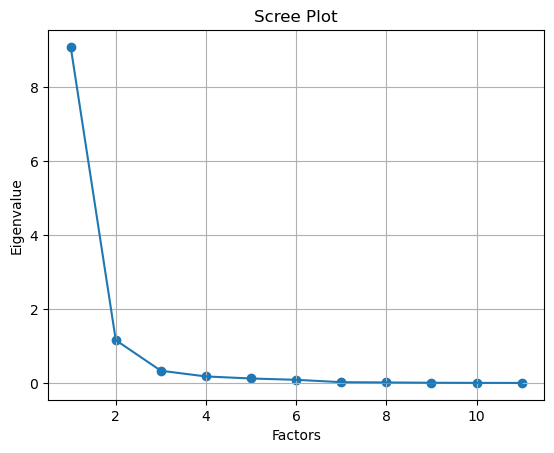

In [19]:
plt.scatter(range(1,df_corr.shape[1]+1),ev)
plt.plot(range(1,df_corr.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


Referring eigenvalues: There are only two values above 1. Therefore, we will choose only 2 factors (or unobserved variables).
Referring Scree plot: There are only two values after the elbow. Therefore, we will choose only 2 factors (or unobserved variables).

In [20]:
fa1 = FactorAnalyzer(rotation="varimax", n_factors=2)
fa1.fit(df, 2)


FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [21]:
fa1.loadings_


array([[ 0.09949822, -0.0175289 ],
       [ 0.76990049,  0.26234151],
       [ 0.97577564, -0.05180551],
       [ 0.37374526,  0.08592885],
       [ 0.97834606,  0.0038596 ],
       [ 0.97757834, -0.04299327],
       [ 0.21011043,  0.61739298],
       [ 0.54025265,  0.78340655],
       [ 0.71664402,  0.63252345],
       [ 0.8480132 ,  0.44148549],
       [ 0.19103233,  0.61468443],
       [-0.26532101,  0.86590233],
       [ 0.7431245 ,  0.18542383],
       [-0.04891221,  0.18458444],
       [ 0.7388625 ,  0.2275271 ],
       [ 0.79163254,  0.08879413],
       [-0.18452397,  0.38701833],
       [ 0.22456327,  0.78529353],
       [ 0.2181755 ,  0.66739594],
       [ 0.3904135 ,  0.59545102],
       [-0.08217263,  0.40098443],
       [-0.03298699,  0.73180421],
       [ 0.98993514, -0.00563542],
       [ 0.36256059,  0.11401422],
       [ 0.99041425,  0.05315551],
       [ 0.97481139, -0.01017728],
       [ 0.18911152,  0.5607166 ],
       [ 0.46178052,  0.69523831],
       [ 0.5755513 ,

It determines the factors and factor loadings of measured variables.
The general assumption of CFA is that every factor has an association with a specific subset of the measured variables.

In [22]:
# CFA stands for Confirmatory Factor Analysis.This line imports CFA function
# from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)


In [23]:
model_dict = {"F1": ['radius_mean','perimeter_mean', 'area_mean','radius_worst',
'perimeter_worst','diagnosis'], "F2": ['area_worst','concavity_mean',
'concave points_mean', 'concavity_worst','concave points_worst']}


In [24]:
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df_corr,model_dict)
# df_corr:Pandas DataFrame and model_dict: dictionary with factors


In [25]:
# Performs confirmatory factor analysis
cfa1 = ConfirmatoryFactorAnalyzer(model_spec, disp=False)
cfa1.fit(df_corr.values)


/Users/michaeldionne/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/confirmatory_factor_analyzer.py:753: UserWarning: The optimization routine failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  warnings.warn(


ConfirmatoryFactorAnalyzer(disp=False, n_obs=569,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x7fa2d8b9b2b0>)

In [26]:
# cfa1.loadings_ will gave you the factor loading matrix
# The factor loading is a matrix which shows the relationship of each variable to the underlying factor.
# It shows the correlation coefficient for observed variable and factor.
# It shows the variance explained by the observed variables.
cfa1.loadings_


array([[-1.14901666e+00,  0.00000000e+00],
       [ 2.49118650e+01,  0.00000000e+00],
       [ 3.15094692e+02,  0.00000000e+00],
       [ 4.36498078e+00,  0.00000000e+00],
       [ 2.77969585e+01,  0.00000000e+00],
       [ 5.31810774e+02,  0.00000000e+00],
       [ 0.00000000e+00,  4.95422895e+00],
       [ 0.00000000e+00,  5.97771041e+00],
       [ 0.00000000e+00,  7.86456211e+00],
       [ 0.00000000e+00,  5.02826882e+00],
       [ 0.00000000e+00,  3.38019244e-01]])

In [27]:
#This will give you the factor covariance matrix and the type of this will be numpy array
cfa1.factor_varcovs_


array([[1.       , 0.0523407],
       [0.0523407, 1.       ]])

In [28]:
# transform(X) used to get the factor scores for new data set.
# Parameters:X (array-like, shape (n_samples, n_features)) – The data to score using the fitted factor model.
# Returns: scores – The latent variables of X.
# Return type:numpy array, shape (n_samples, n_components)
cfa1.transform(df_corr.values)


array([[ 1.98732527e+00,  2.47333001e-02],
       [ 2.03541975e+00,  7.56262637e-04],
       [ 1.58438759e+00,  1.41577833e-02],
       ...,
       [ 4.86992235e-01,  2.93754088e-03],
       [ 1.79814076e+00,  3.33461268e-02],
       [-1.20754944e+00, -1.38542719e-02]])